In [4]:
import pandas as pd
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Load the dataset from Google Drive, specifying the 'latin-1' encoding
try:
    df = pd.read_csv('/content/drive/MyDrive/Online retail.zip', encoding='latin-1', compression='zip')
except UnicodeDecodeError:
    # If 'latin-1' fails, you can try another encoding like 'cp1252' or remove the encoding parameter
    print("'latin-1' encoding failed. You may need to try another encoding.")
    # Example of trying another encoding:
    # df = pd.read_csv('/content/drive/MyDrive/Online retail.zip', encoding='cp1252', compression='zip')

Mounted at /content/drive


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Online retail.zip'

In [6]:
import pandas as pd

# Replace 'your_file_name.csv' with the actual name of your uploaded CSV file
file_path = 'OnlineRetail.csv'

try:
    # Attempt to read the CSV with default encoding
    df = pd.read_csv(file_path, encoding='latin-1', compression='zip')
except UnicodeDecodeError:
    # If default encoding fails, try 'latin-1'
    try:
        df = pd.read_csv(file_path, encoding='latin-1', compression='zip')
    except UnicodeDecodeError:
        # If 'latin-1' also fails, try 'cp1252'
        try:
            df = pd.read_csv(file_path, encoding='cp1252', compression='zip')
        except Exception as e:
            print(f"Could not read the file with common encodings: {e}")
except FileNotFoundError:
    print(f"File not found at {file_path}. Please check the file name and ensure it's in the correct location.")
except Exception as e:
    print(f"An error occurred: {e}")

# Display the first few rows of the dataframe to confirm it loaded correctly
if 'df' in locals():
    display(df.head())

An error occurred: File is not a zip file


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [7]:
# Fill or drop missing values
df = df.dropna()  # Drop rows with missing values (or use df.fillna() to fill them)

# Remove duplicates
df = df.drop_duplicates()

# Convert 'InvoiceDate' column to datetime type
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])


In [9]:
# Calculate the 'Sales' column
df['Sales'] = df['Quantity'] * df['UnitPrice']

# Descriptive statistics for numerical columns
desc_stats = df[['Sales', 'Quantity']].describe()
print(desc_stats)

               Sales       Quantity
count  401604.000000  401604.000000
mean       20.613638      12.183273
std       430.352218     250.283037
min   -168469.600000  -80995.000000
25%         4.250000       2.000000
50%        11.700000       5.000000
75%        19.800000      12.000000
max    168469.600000   80995.000000


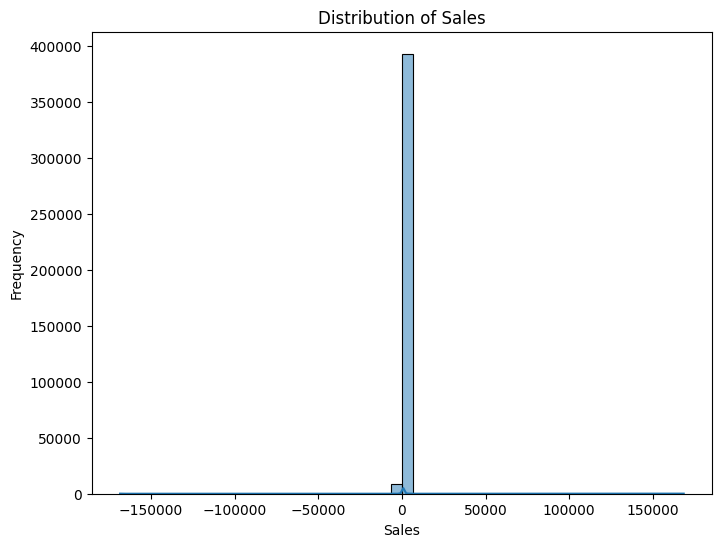

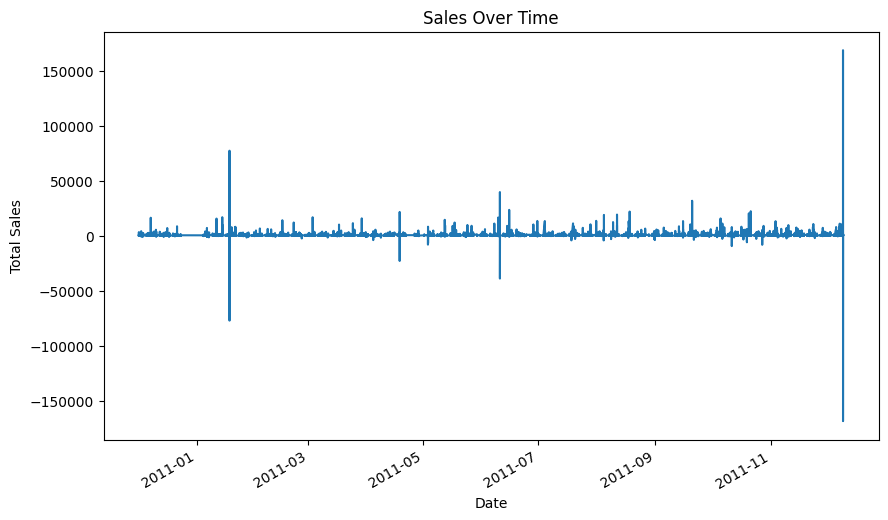

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of customer sales
plt.figure(figsize=(8, 6))
sns.histplot(df['Sales'], bins=50, kde=True)
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

# Bar chart for sales by product category
# Assuming 'Category' column exists or needs to be created. If not, this will fail.
# If 'Category' is not a direct column, you might need to derive it from 'Description' or 'StockCode'.
if 'Category' in df.columns:
    sales_by_category = df.groupby('Category')['Sales'].sum().sort_values(ascending=False)
    sales_by_category.plot(kind='bar', figsize=(8, 6))
    plt.title('Sales by Product Category')
    plt.xlabel('Category')
    plt.ylabel('Total Sales')
    plt.show()
else:
    print("Warning: 'Category' column not found. Skipping sales by category plot.")


# Line chart for sales over time
sales_by_date = df.groupby('InvoiceDate')['Sales'].sum()
sales_by_date.plot(kind='line', figsize=(10, 6))
plt.title('Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.show()